# Principal Component Analysis
<hr>

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
filename = 'Assignment 11 text data.txt'
feature  = np.genfromtxt(filename, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)
print(' number of data points: {}'.format(number_data))
print(' number of data features: {}'.format(number_feature))

 number of data points: 50
 number of data features: 2


## plot the input data

In [3]:
def plot_data(feature):
    plt.figure(figsize=(8,8))   
    plt.title('input data')

    plt.plot(feature[:, 0], feature[:, 1], 'o', color='blue')

    plt.tight_layout()
    plt.show()

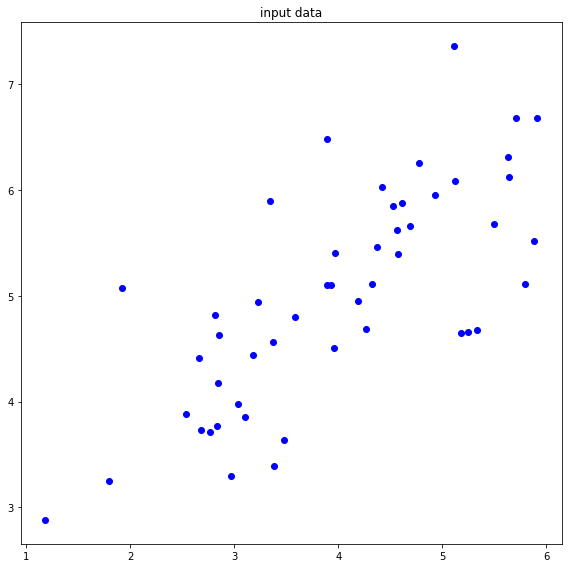

In [4]:
plot_data(feature)

## Normalization (Z-scoring)

In [5]:
normalized_x = (x - np.mean(x)) / np.std(x)
normalized_y = (y - np.mean(y)) / np.std(y)

print(' mean of x = {}'.format( np.mean(normalized_x) ))
print(' mean of y = {}'.format( np.mean(normalized_y) ))
print(' std of x = {}'.format( np.std(normalized_x) ))
print(' std of y = {}'.format( np.std(normalized_y) ))

normalized_feature = np.zeros((len(feature), 2))
normalized_feature[:, 0] = normalized_x
normalized_feature[:, 1] = normalized_y
print('\n normalized feature shape: {}'.format( normalized_feature.shape ))

 mean of x = -1.509903313490213e-16
 mean of y = -4.840572387365683e-16
 std of x = 0.9999999999999999
 std of y = 0.9999999999999999

 normalized feature shape: (50, 2)


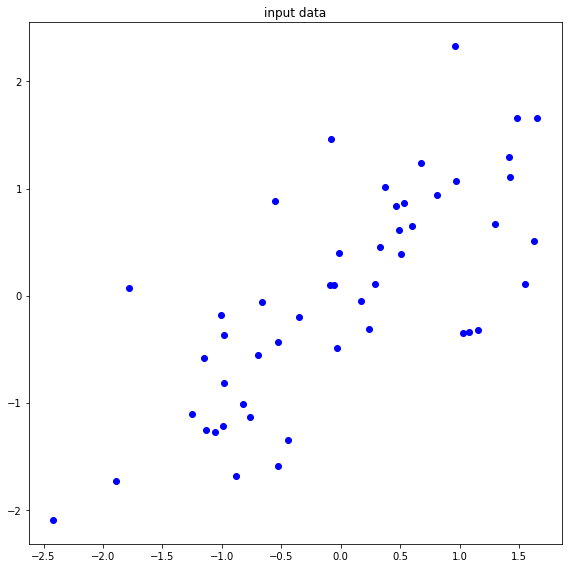

In [6]:
plot_data(normalized_feature)

## compute covariance matrix

In [7]:
def compute_covariance(feature):
    Sigma = np.cov(feature.T)
    return Sigma

## compute principal directions

In [8]:
def compute_eigen(X):
    S = np.linalg.eig(X)[0]
    U = np.linalg.eig(X)[1]
    return S, U

In [9]:
# covariance matrix
covariance = compute_covariance(normalized_feature)

# eigen value, eigen vector
eigenval, eigenvec = compute_eigen(covariance)

# compute directions via eigen value and eigen vector
direction1 = eigenval[0] * eigenvec[:,0]
direction2 = eigenval[1] * eigenvec[:,1]

In [10]:
def plot_principal_directions(feature, direction1, direction2):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    plt.plot(feature[:, 0], feature[:, 1], 'o', color='blue')
    plt.annotate('', xy=(direction1), xytext=(0,0), arrowprops=dict(facecolor='red', edgecolor='red', width=0.5))
    plt.annotate('', xy=(direction2), xytext=(0,0), arrowprops=dict(facecolor='green', edgecolor='green', width=0.5))

    plt.tight_layout()
    plt.show()

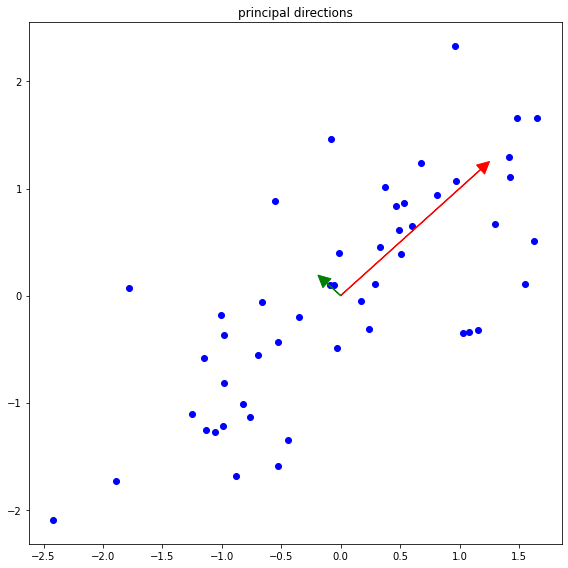

In [11]:
plot_principal_directions(normalized_feature, direction1, direction2)

## first principal axis

In [12]:
def plot_principal_axis1(feature, eigenvec):
    plt.figure(figsize=(8,8))
    plt.title('first principal axis')

    # compute axis slope via eigen vector
    XX = np.arange(min(normalized_x)-0.5, max(normalized_x)+0.5, 0.1)
    YY = (eigenvec[1, 0] / eigenvec[0, 0]) * XX

    plt.plot(feature[:, 0], feature[:, 1], 'o', color='blue')
    plt.plot(XX, YY, '-', color='red')

    plt.tight_layout()
    plt.show()

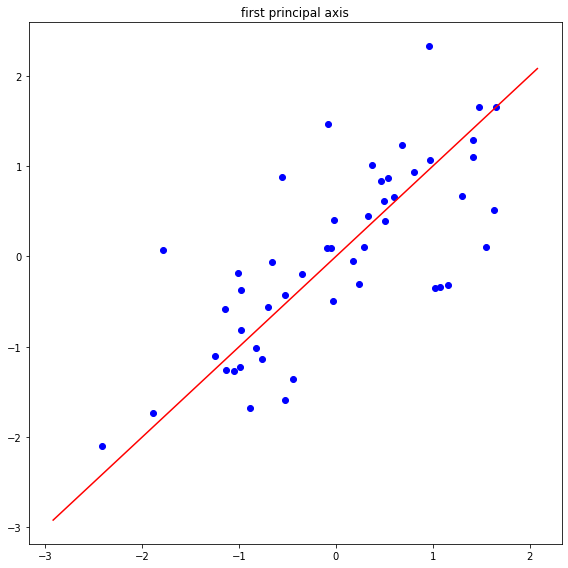

In [13]:
plot_principal_axis1(normalized_feature, eigenvec)

## second principal axis

In [14]:
def plot_principal_axis2(feature, eigenvec):
    plt.figure(figsize=(8,8))
    plt.title('second principal axis')

    # compute axis slope via eigen vector
    XX = np.arange(min(normalized_x)-0.5, max(normalized_x)+0.5, 0.1)
    YY = (eigenvec[1, 1] / eigenvec[0, 1]) * XX

    plt.plot(feature[:, 0], feature[:, 1], 'o', color='blue')
    plt.plot(XX, YY, '-', color='red')

    plt.tight_layout()
    plt.show()

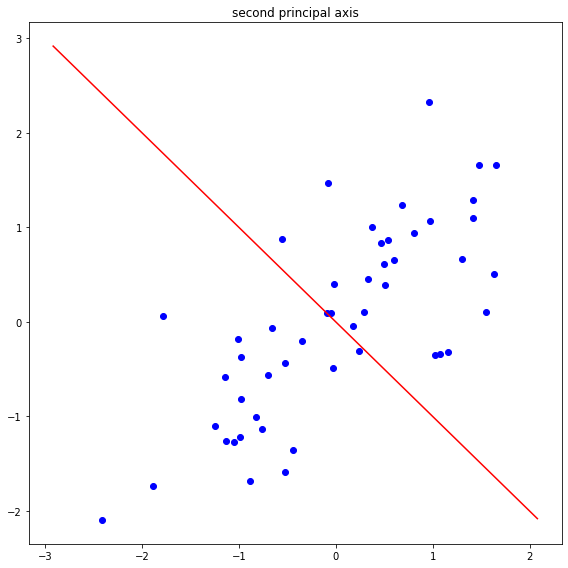

In [15]:
plot_principal_axis2(normalized_feature, eigenvec)

## compute the projection of point onto the line

In [16]:
def compute_projection_onto_line(feature, vector):
    projection = []
    
    for i in range(len(feature)):
        # use dot product to compute projection
        value = np.dot(feature[i, :], vector)
        projection.append(value * vector)
        
    projection = np.array(projection)      
    return projection

## project to the first principal axis

In [17]:
def plot_projection_points1(feature, eigenvec):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    XX = np.arange(min(normalized_x)-0.5, max(normalized_x)+0.5, 0.1)
    YY = (eigenvec[1, 0] / eigenvec[0, 0]) * XX
    
    # projection points
    projection1 = compute_projection_onto_line(normalized_feature, eigenvec[:, 0]) 

    plt.plot(feature[:, 0], feature[:, 1], 'o', color='blue')
    plt.plot(XX, YY, '-', color='red')
    plt.plot(projection1[:, 0], projection1[:, 1], 'o', color='green')

    plt.tight_layout()
    plt.show()

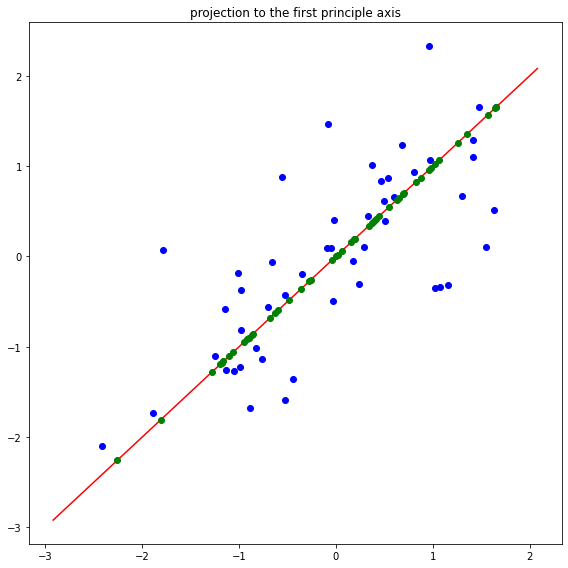

In [18]:
plot_projection_points1(normalized_feature, eigenvec)

## projcet to the second principal axis

In [19]:
def plot_projection_points2(feature, eigenvec):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    XX = np.arange(min(normalized_x)-0.5, max(normalized_x)+0.5, 0.1)
    YY = (eigenvec[1, 1] / eigenvec[0, 1]) * XX
    
    # projection points
    projection2 = compute_projection_onto_line(feature, eigenvec[:, 1]) 

    plt.plot(feature[:, 0], feature[:, 1], 'o', color='blue')
    plt.plot(XX, YY, '-', color='red')
    plt.plot(projection2[:, 0], projection2[:, 1], 'o', color='green')

    plt.tight_layout()
    plt.show()

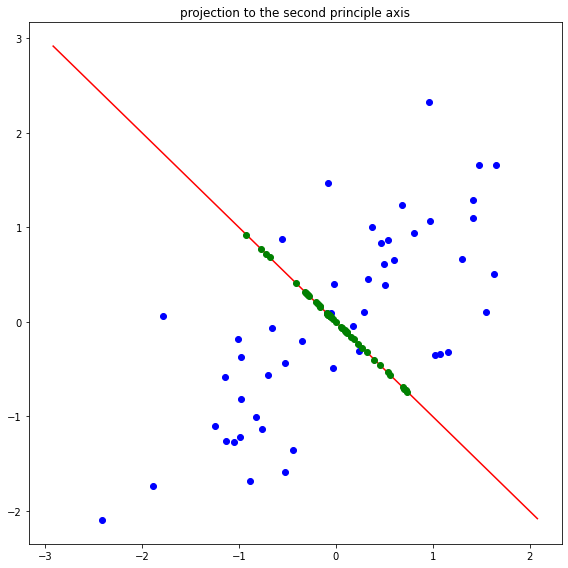

In [20]:
plot_projection_points2(normalized_feature, eigenvec)

## connect original data to the projection onto the first principal axis

In [21]:
def plot_connection_points1(feature, eigenvec):
    plt.figure(figsize=(8,8))
    plt.title('connecction to the first principle axis')

    XX = np.arange(min(normalized_x)-0.5, max(normalized_x)+0.5, 0.1)
    YY = (eigenvec[1, 0] / eigenvec[0, 0]) * XX
    
    # projection points
    projection1 = compute_projection_onto_line(feature, eigenvec[:, 0]) 

    plt.plot(feature[:, 0], feature[:, 1], 'o', color='blue')
    plt.plot(XX, YY, '-', color='red')
    plt.plot(projection1[:, 0], projection1[:, 1], 'o', color='green')

    # connection points
    for i in range(len(feature)):
        connect_x = feature[i, 0], projection1[i, 0]
        connect_y = feature[i, 1], projection1[i, 1]
        plt.plot(connect_x, connect_y, '-', color='gray')

    plt.tight_layout()
    plt.show()

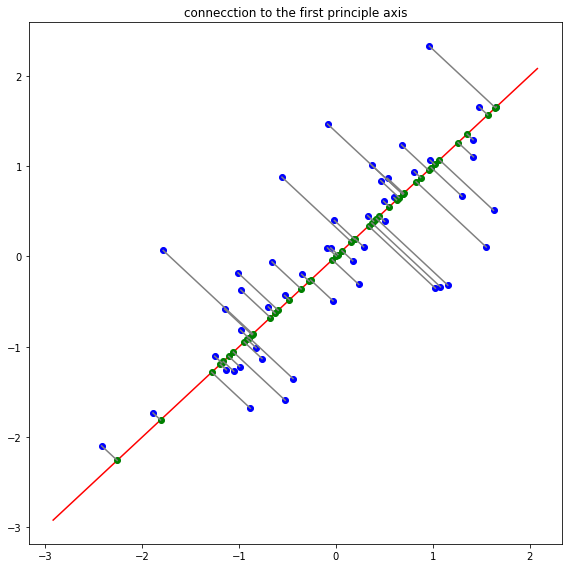

In [22]:
plot_connection_points1(normalized_feature, eigenvec)

## connect original data to the projection onto the second principal axis

In [23]:
def plot_connection_points2(feature, eigenvec):
    plt.figure(figsize=(8,8))
    plt.title('connection to the second principle axis')

    XX = np.arange(min(normalized_x)-0.5, max(normalized_x)+0.5, 0.1)
    YY = (eigenvec[1, 1] / eigenvec[0, 1]) * XX
    
    # projection points
    projection2 = compute_projection_onto_line(feature, eigenvec[:, 1]) 

    plt.plot(feature[:, 0], feature[:, 1], 'o', color='blue')
    plt.plot(XX, YY, '-', color='red')
    plt.plot(projection2[:, 0], projection2[:, 1], 'o', color='green')

    # connection points
    for i in range(len(feature)):
        connect_x = feature[i, 0], projection2[i, 0]
        connect_y = feature[i, 1], projection2[i, 1]
        plt.plot(connect_x, connect_y, '-', color='gray')

    plt.tight_layout()
    plt.show()

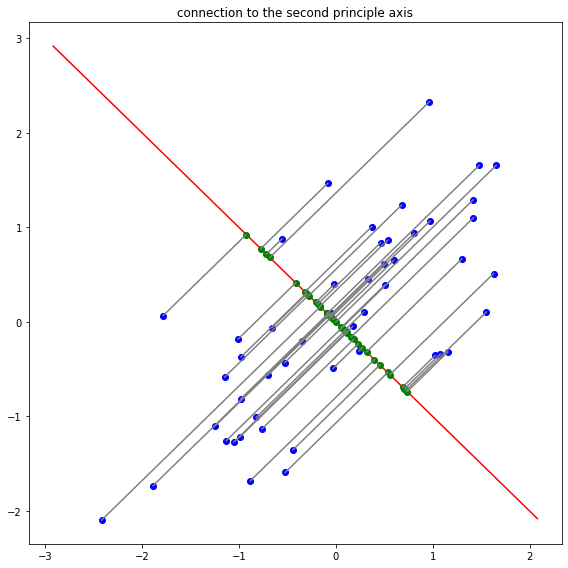

In [24]:
plot_connection_points2(normalized_feature, eigenvec)

# Results
<hr>

## 01. plot the input data after the normalization using Z-scoring in blue

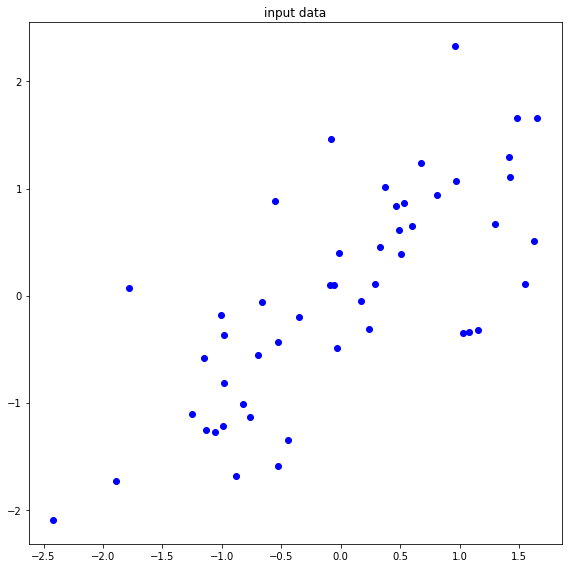

In [25]:
plot_data(normalized_feature)

## 02. plot the first principal component in red and the second principal components in green on the normalized data in blue

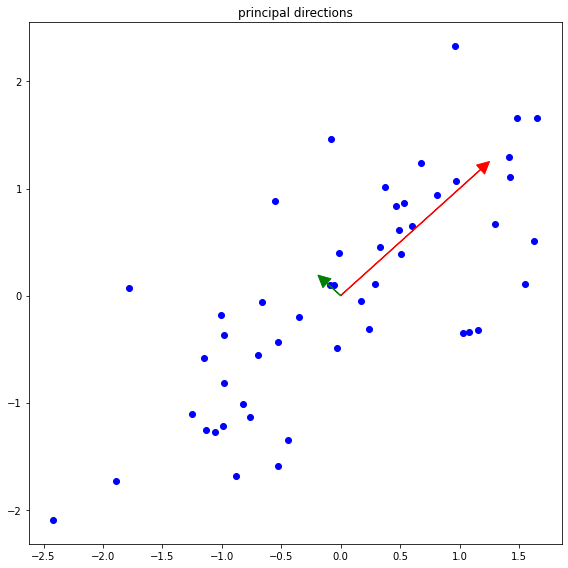

In [26]:
plot_principal_directions(normalized_feature, direction1, direction2)

## 03. plot the first principal axis in red on the normalized data in blue

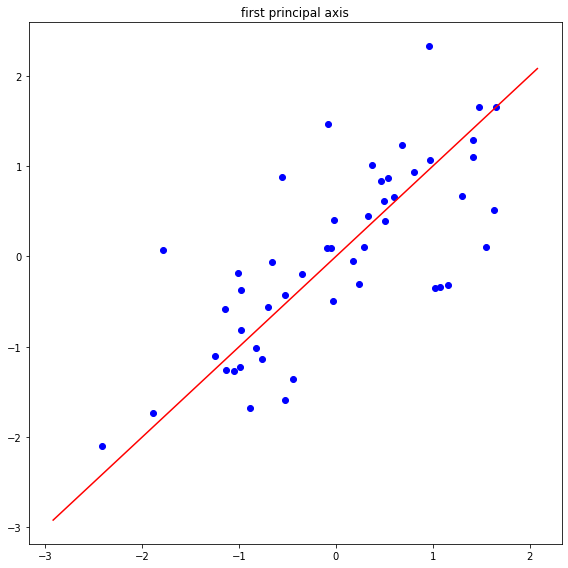

In [27]:
plot_principal_axis1(normalized_feature, eigenvec)

## 04. plot the second principal axis in red on the normalized data in blue

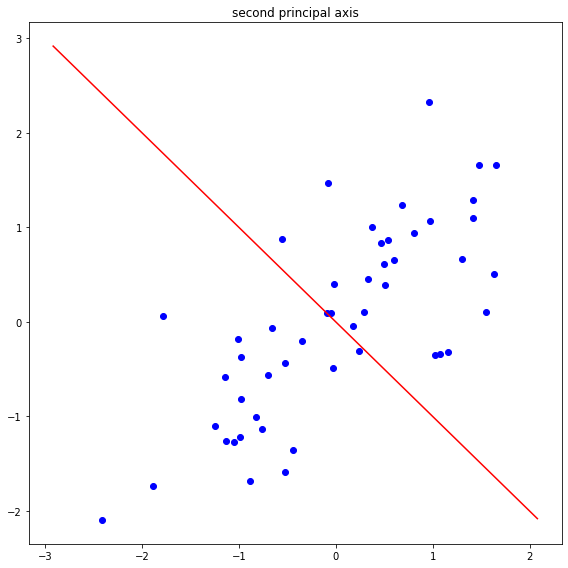

In [28]:
plot_principal_axis2(normalized_feature, eigenvec)

## 05. plot the projection of data in green onto the first principal axis in red

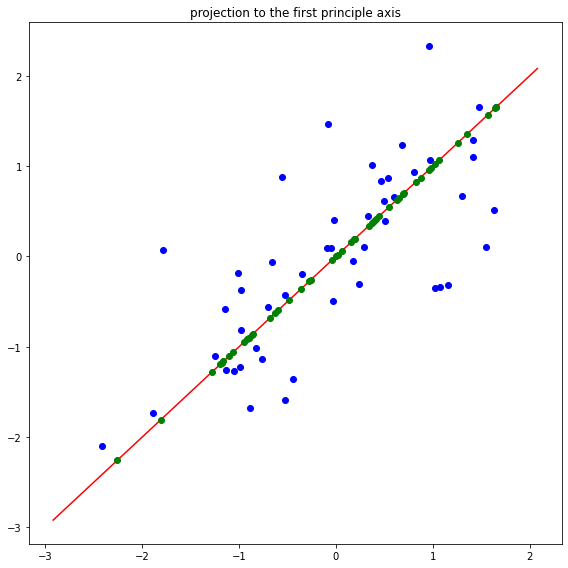

In [29]:
plot_projection_points1(normalized_feature, eigenvec)

## 06. plot the projection of data in green onto the second principal axis in red

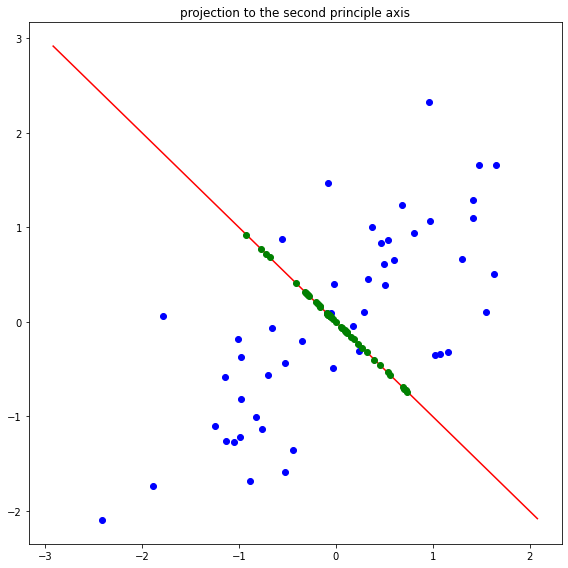

In [30]:
plot_projection_points2(normalized_feature, eigenvec)

## 07. plot the projection line in grey onto the first principal axis

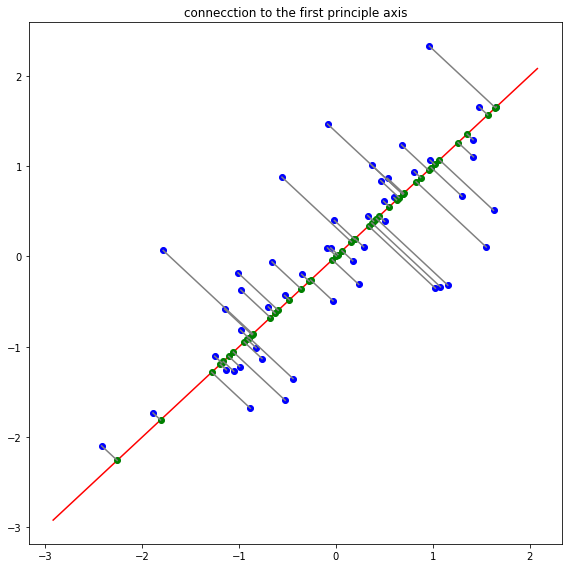

In [31]:
plot_connection_points1(normalized_feature, eigenvec)

## 08. plot the projection line in grey onto the second principal axis

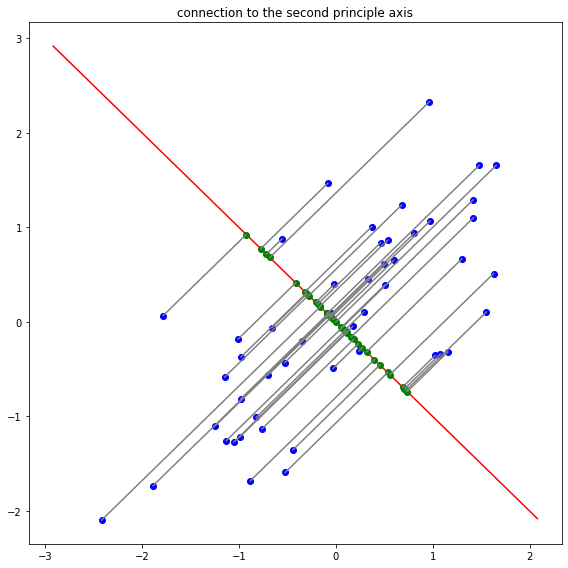

In [32]:
plot_connection_points2(normalized_feature, eigenvec)